In [24]:
import os, time
import matplotlib.pyplot as plt
import pickle

5000000
0.5691204199699683


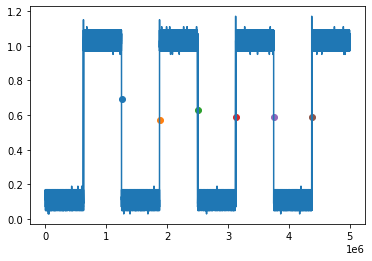

In [48]:
channel = "2"
with open("ch"+channel+".txt", "rb") as fp:   #Pickling
    CLK_scaled_wave = pickle.load(fp)

#DATA_rows  = [(idx, item) for idx,item in enumerate(CLK_scaled_wave, start=1)]
print(len(CLK_scaled_wave))

def find_timedif(Rawdata):
    delta = 1
    avg = sum(Rawdata)/len(Rawdata)
    print((avg)*delta)

    tmp = []
    for index, val in enumerate(Rawdata):
        if val >= (avg)*delta:
            tmp.append([index, val])

    pk2pk_time = []
    for index, val in enumerate(tmp):
        if index < len(tmp)-1:
            #print(tmp[index+1][0] - val[0])
            time_dif = tmp[index+1][0] - val[0]
            if (time_dif) >= 10:
                pk2pk_time.append([time_dif, [val[0], val[1]], [tmp[index+1][0], tmp[index+1][1]]])

    return pk2pk_time

pk2pk_time = find_timedif(CLK_scaled_wave)

for pk2pk_val in pk2pk_time:
    plt.scatter(pk2pk_val[1][0], pk2pk_val[1][1])
    plt.scatter(pk2pk_val[2][0], pk2pk_val[2][1])

plt.plot(CLK_scaled_wave)
plt.show()



In [49]:
for index in range(len(pk2pk_time)):
    print(pk2pk_time[index][0])


625013
625013
625013


-4.000000000364789e-07


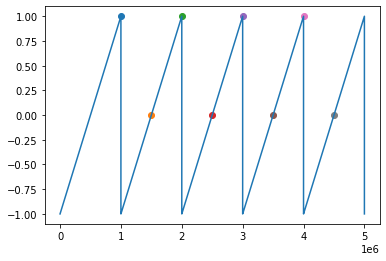

In [50]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 5000000 )            # 定義時間陣列
x = signal.sawtooth( 2 * np.pi * 5 * t ) # 產生鋸齒波

pk2pk_time = find_timedif(x)

for pk2pk_val in pk2pk_time:
    plt.scatter(pk2pk_val[1][0], pk2pk_val[1][1])
    plt.scatter(pk2pk_val[2][0], pk2pk_val[2][1])

plt.plot(x)
plt.show()

-2.545495370043227e-15


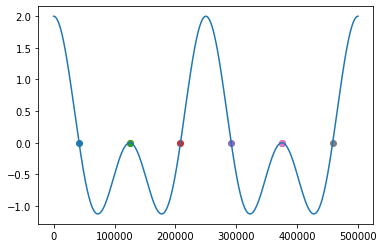

In [53]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 500000, endpoint = False ) # 定義時間陣列

f1 = 2                                          # 定義基礎頻率
x1 = np.cos( 2 * np.pi * f1 * t )               # 產生第1個弦波
x2 = np.cos( 2 * np.pi * 2 * f1 * t )           # 產生第2個弦波
x = x1 + x2     

pk2pk_time = find_timedif(x)

for pk2pk_val in pk2pk_time:
    plt.scatter(pk2pk_val[1][0], pk2pk_val[1][1])
    plt.scatter(pk2pk_val[2][0], pk2pk_val[2][1])

plt.plot(x)
plt.show()


0.0005000000000000177


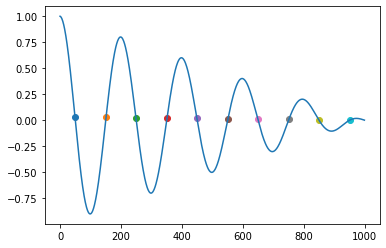

In [54]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 1000, endpoint = False ) # 定義時間陣列

x = np.cos( 2 * np.pi * 5 * t )                 # 產生弦波
a = np.linspace( 1, 0, 1000, endpoint = False ) # 產生淡出陣列 
x = x * a                                       # 套用淡出效果 


pk2pk_time = find_timedif(x)

for pk2pk_val in pk2pk_time:
    plt.scatter(pk2pk_val[1][0], pk2pk_val[1][1])
    plt.scatter(pk2pk_val[2][0], pk2pk_val[2][1])

plt.plot(x)
plt.show()


0.07175118191329258
40.25


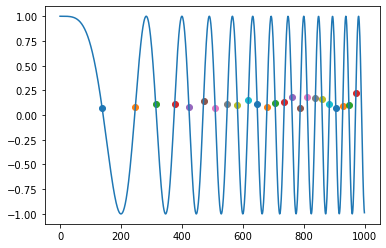

In [56]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

t = np.linspace( 0, 5, 1000, endpoint = False ) # 定義時間陣列
x = signal.chirp( t, 0, 5, 5, 'linear' )        # 產生啁啾訊號

pk2pk_time = find_timedif(x)

timedif_avg = []

for pk2pk_val in pk2pk_time:
    plt.scatter(pk2pk_val[1][0], pk2pk_val[1][1])
    plt.scatter(pk2pk_val[2][0], pk2pk_val[2][1])
    timedif_avg.append(pk2pk_val[0])

print(sum(timedif_avg)/len(timedif_avg))
plt.plot(x)
plt.show()